In [1]:
!pip install wordcloud
!pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.3 MB 8.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/16.3 MB 7.4 MB/s eta 0:00:02
   ---------- ----------------------------- 4.5/16.3 MB 7.3 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.3 MB 7.6 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.3 MB 7.3 MB/s eta 0:00:02
   -------------------- ------------------- 8.4/16.3 MB 6.9 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.3 MB 6.9 MB/s eta 0:00:01
   --------------------------- ------------ 11.3/16.3 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 12.6/16.3 MB 6.7 MB/s eta 0:00:01
   ---------------------------------- ----- 14.2/16.3 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 15.7/16.3 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 16.3/16.3 MB 6.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import plotly.express as px
from collections import Counter

In [3]:
file_path = r"C:\Users\hansa\OneDrive\Desktop\netflix1 (1).xlsx"
df = pd.read_excel(file_path)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.drop_duplicates(inplace=True)
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')
df.dtypes

show_id                  object
type                     object
title                    object
director                 object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
duration_int            float64
duration_type            object
dtype: object

C:\Users\hansa\AppData\Local\Temp\ipykernel_28308\2075938853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


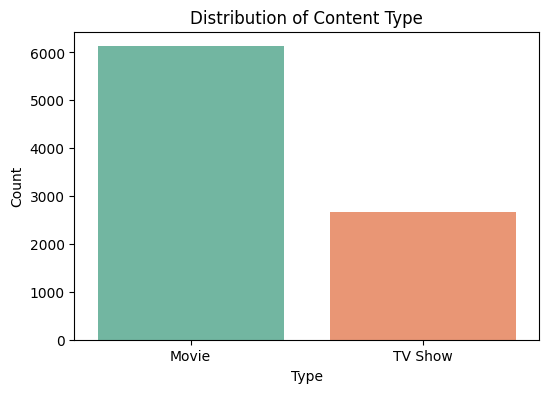

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

C:\Users\hansa\AppData\Local\Temp\ipykernel_28308\3952351829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')


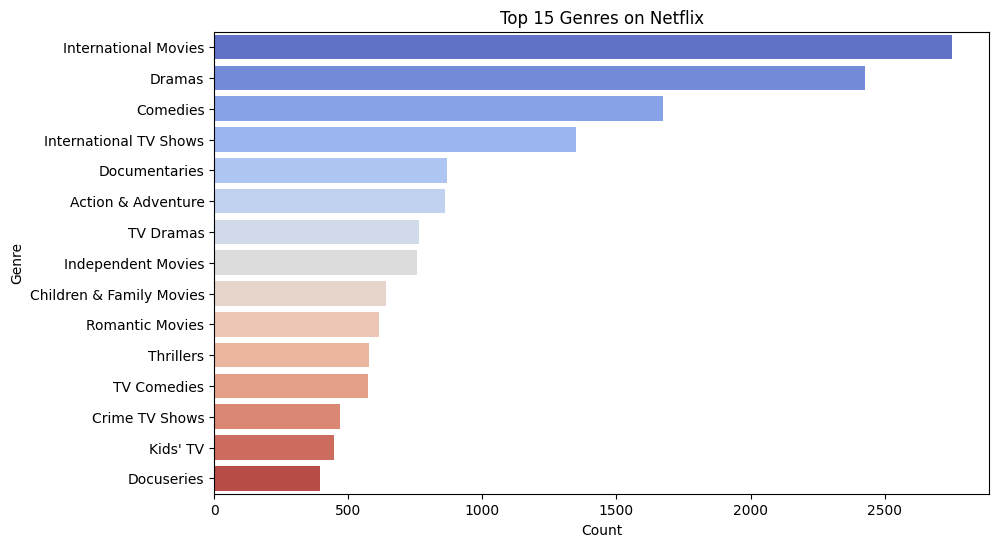

In [7]:
genre_series = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in genre_series for genre in sublist])
genre_df = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm')
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

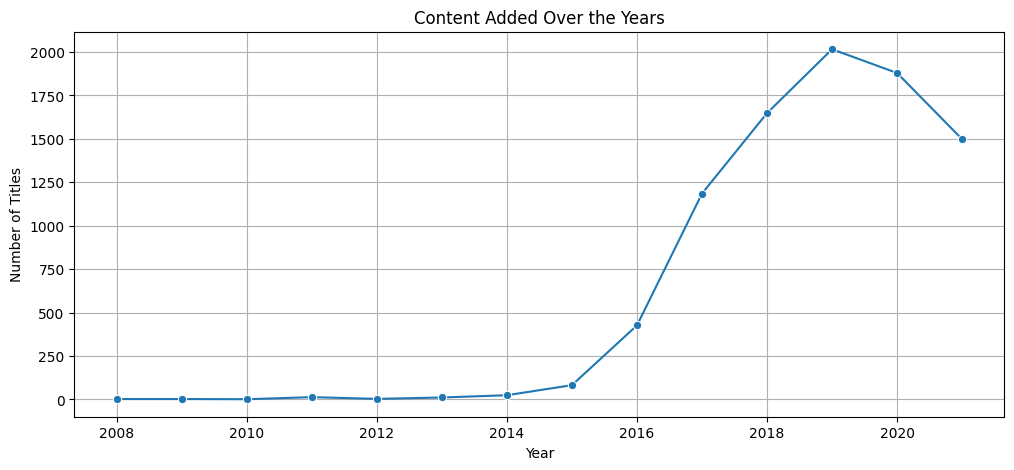

In [8]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

C:\Users\hansa\AppData\Local\Temp\ipykernel_28308\1346209102.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


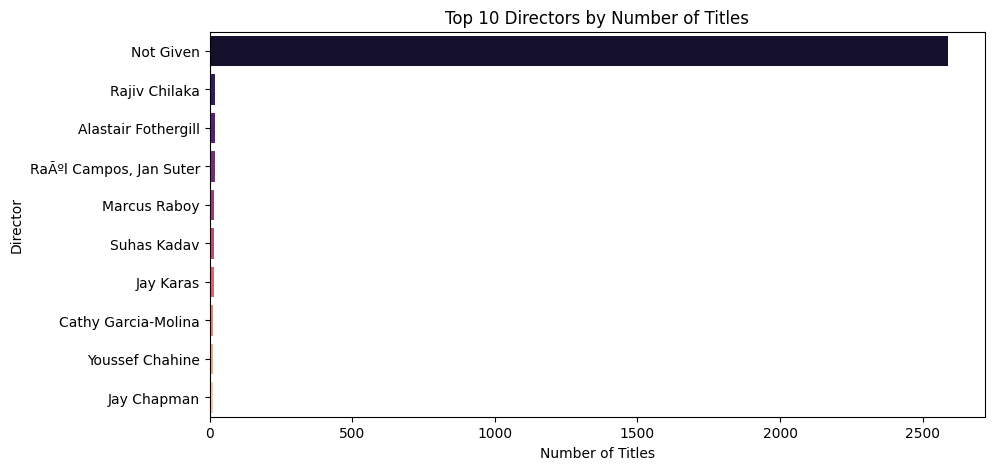

In [9]:
top_directors = df[df['director'] != '']['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

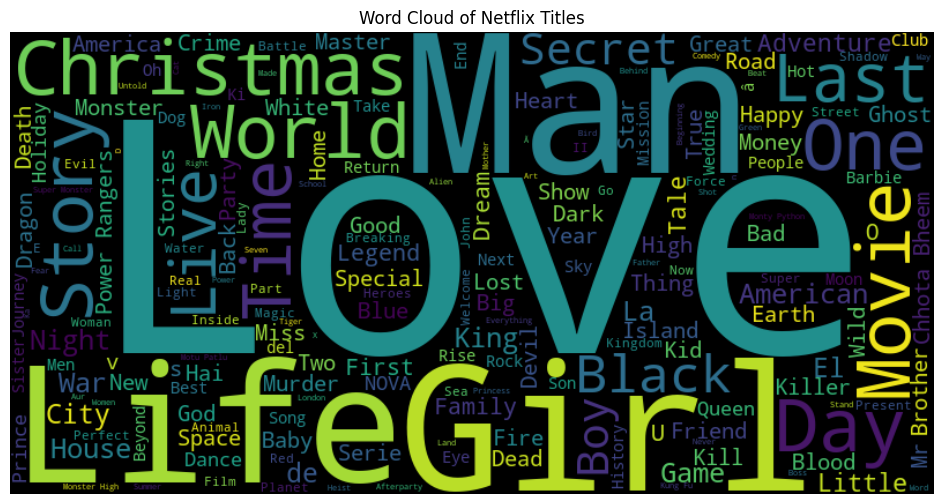

In [13]:
text = " ".join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Netflix Titles")
plt.show()

In [15]:
df['year_added'] = df['date_added'].dt.year
df['num_genres'] = df['listed_in'].dropna().apply(lambda x: len(x.split(',')))
df['duration_int'] = pd.to_numeric(df['duration'].str.extract(r'(\\d+)')[0], errors='coerce')
df_model = df[['year_added', 'num_genres', 'duration_int']].dropna()
print("Number of samples after cleaning:", len(df_model))
if len(df_model) > 5:
    X = df_model[['year_added', 'num_genres']]
    y = df_model['duration_int']
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, r2_score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
else:
    print("❌ Not enough data after cleaning to build the model.")

Number of samples after cleaning: 0
❌ Not enough data after cleaning to build the model.


In [16]:
interactive_fig = px.histogram(df, x='year_added', color='type',
                               title='Content Added per Year by Type',
                               labels={'year_added': 'Year'},
                               barmode='group')
interactive_fig.show()